In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import us  # Import the us library

from causallearn.search.ConstraintBased.PC import pc


# Loading the Data

In [4]:
df = pd.read_csv("shopping_behavior.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


# Exploratory Data Analysis

## Check for Missing Data

There was no missing data in our dataset

In [34]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Age Distribution

There is a pretty even distribution with the ages in this data set

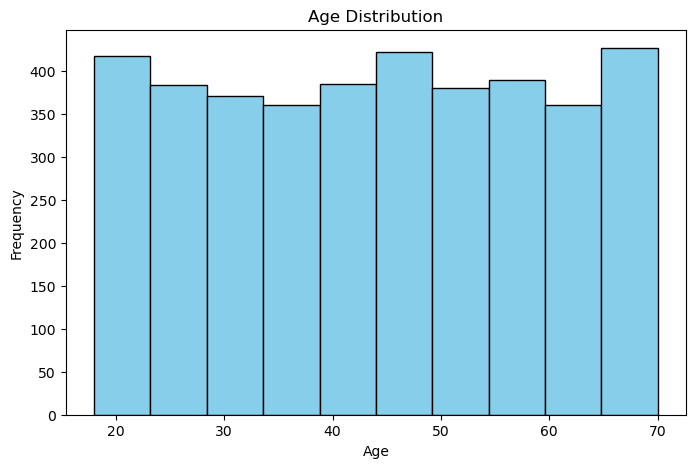

In [11]:
# Plotting the histogram of Age
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Purchase Amounts

The distribution of Purchase Amounts is also pretty even

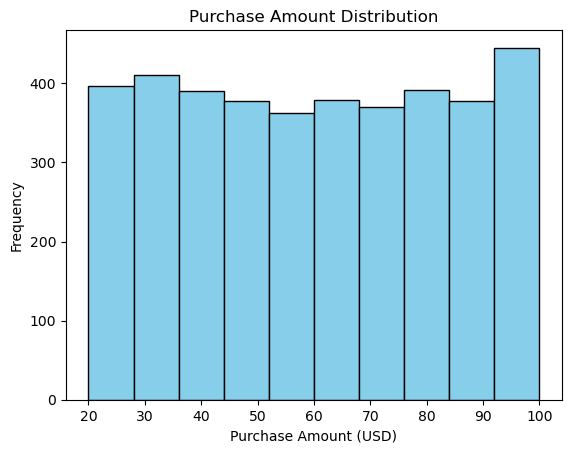

In [12]:
plt.hist(df['Purchase Amount (USD)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

## Location of Purchase
Purchase amounts seem pretty even across the states, with more in California and suprisingly Montana and Illinois.

In [127]:
state_counts = pd.DataFrame(df['Location'].value_counts()).reset_index()
state_counts.columns = ['State', 'Frequency']

def get_abbrev(state_name):
    try:
        return us.states.lookup(state_name).abbr
    except AttributeError:
        return None  # Handle cases where state name might not be found

# Assuming the DataFrame has a column 'state' with full state names; replace 'state' with the appropriate column
state_counts['Abbr'] = state_counts['State'].apply(get_abbrev)


fig = go.Figure(
        data=go.Choropleth(
        locations=state_counts['Abbr'], # Spatial coordinates
        z = state_counts['Frequency'].astype(float), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = "Frequency of Purchase",
       ))

fig.update_layout(
    title_text = 'Frequency of Purchase by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [90]:
df['Shipping Type'].value_counts()

Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

In [22]:
df['Frequency of Purchases'].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

In [59]:
data_encoded = pd.get_dummies(df[['Age','Purchase Amount (USD)', 'Gender','Previous Purchases','Discount Applied','Subscription Status', 'Frequency of Purchases','Season','Category','Item Purchased']], drop_first=True)
data_encoded

,Age,Purchase Amount (USD),Previous Purchases,Gender_Male,Discount Applied_Yes,Subscription Status_Yes,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,55,53,14,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19,64,2,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,50,73,23,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,90,49,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,49,31,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,28,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,52,49,41,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,46,33,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,44,77,24,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [81]:
# takes a long time to run
data_frame = data_encoded
# Step 1: Convert DataFrame to NumPy array
data_array = data_frame.to_numpy()

# Step 2: Apply the PC algorithm to discover the causal graph
alpha = 0.05  # Significance level
pc_graph = pc(data_array, alpha)

# Step 3: Create labels for nodes based on DataFrame columns
node_labels = {i: col for i, col in enumerate(data_encoded.columns)}

# Step 4: Extract edges from the pc_graph and create a NetworkX directed graph
G = nx.DiGraph()
G.add_nodes_from(node_labels.keys())

# Add edges based on the adjacency matrix
for i in range(len(pc_graph.G.graph)):
    for j in range(len(pc_graph.G.graph)):
        if pc_graph.G.graph[i, j] != 0:
            G.add_edge(i, j)

  0%|          | 0/42 [00:00<?, ?it/s]

KeyboardInterrupt: 

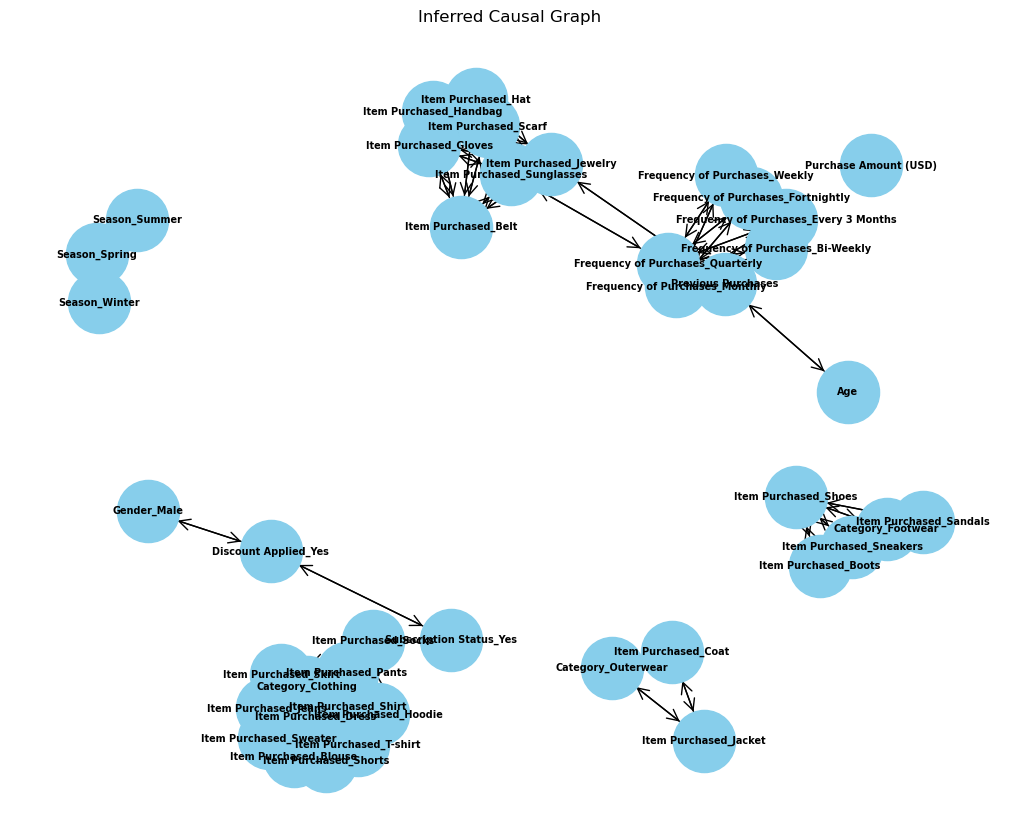

In [80]:
# Step 5: Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Increase k for more space between nodes
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=2000, node_color="skyblue", font_size=7, font_weight="bold", arrowstyle="->", arrowsize=20)
plt.title("Inferred Causal Graph")
plt.show()

Some notable things:
- Coat, Outwear and Jacket purchases are related
- Shoes, Footwear, Sandals, Sneakers, Boots purchases are related
- Purchases relating to Belt, Hat, Handbag, Jewlery and other Acccessories are related to Frequency of Purchases, which are also related to Age. Specifically this could mean that Age is possible correlated to how frequently someone makes purchases, and those who make purchases frequently are often going to buy accessories.
- There appears to be a relation between people with or without subscription status on this website and whether or not people use discount codes, and the gender of the purchaser.